In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# the scaler - for min-max scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
X_train = pd.read_csv("Xtrain_tvshows_cat.csv")
X_test = pd.read_csv("Xtest_tvshows_cat.csv")

print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
#print("Shape of y Train: {}".format(ytrain.shape))
#print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (1074, 7)
Shape of X Test: (4294, 7)


In [4]:
X_train.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,8,6.8,10.0,0,0,1,0
1,4,8.7,62.0,1,0,0,0
2,6,6.6,13.0,0,0,1,0
3,8,8.7,10.0,0,1,0,0
4,5,7.2,62.0,1,0,0,0


In [5]:
X_train_sel = X_train[['Year','IMDb','Rotten_Tomatoes']]
X_test_sel = X_test[['Year','IMDb','Rotten_Tomatoes']]

print("Shape ausgelesenes Format Train: {}".format(X_train_sel.shape))
print("Shape ausgelesenes Format Test: {}".format(X_test_sel.shape))

Shape ausgelesenes Format Train: (1074, 3)
Shape ausgelesenes Format Test: (4294, 3)


In [6]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_sel)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_sel.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_sel.columns)

NameError: name 'sns' is not defined

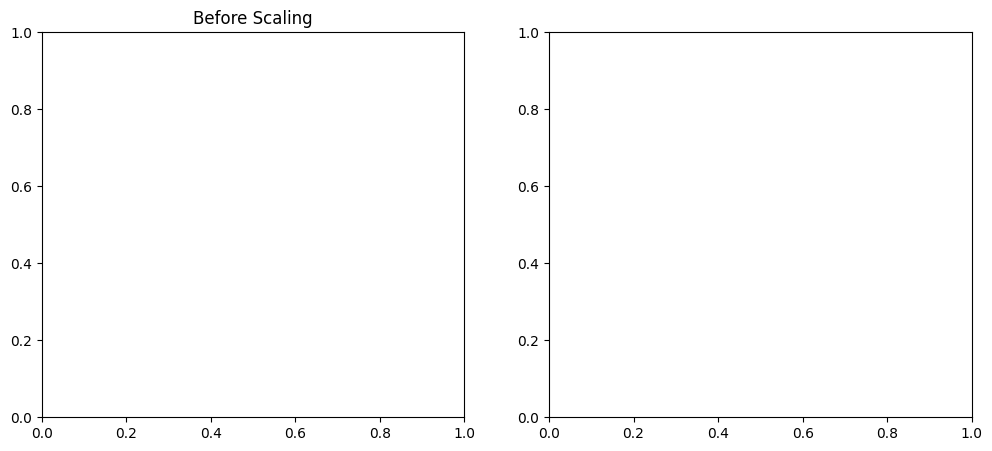

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_sel['Rotten_Tomatoes'], ax=ax1)
sns.kdeplot(X_train_sel['IMDb'], ax=ax1)
ax1.set_xlabel("Grösse der Variablen")

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Rotten_Tomatoes'], ax=ax2)
sns.kdeplot(X_train_scaled['IMDb'], ax=ax2)
ax2.set_xlabel("Grösse der Variablen")
plt.show()

In [9]:
X_train.drop(['Year','IMDb','Rotten_Tomatoes'], axis = 1, inplace=True)
X_test.drop(['Year','IMDb','Rotten_Tomatoes'], axis =1, inplace = True)
print("Shape of prepared train data set: {}".format(X_train.shape))
print("Shape of prepared test data set: {}".format(X_test.shape))

Shape of prepared train data set: (1074, 4)
Shape of prepared test data set: (4294, 4)


In [10]:
X_train_prep_tot = pd.concat([X_train_scaled, X_train], axis = 1)
X_test_prep_tot = pd.concat([X_test_scaled, X_test], axis = 1)
print("Shape of prepared train data set: {}".format(X_train_prep_tot.shape))
print("Shape of prepared test data set: {}".format(X_test_prep_tot.shape))

Shape of prepared train data set: (1074, 7)
Shape of prepared test data set: (4294, 7)


In [11]:
X_train_prep_tot.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0.068966,0.641026,0.000000,0,0,1,0
1,0.022989,0.884615,0.626506,1,0,0,0
2,0.045977,0.615385,0.036145,0,0,1,0
3,0.068966,0.884615,0.000000,0,1,0,0
4,0.034483,0.692308,0.626506,1,0,0,0


In [12]:
X_train_prep_tot.to_csv("Xtrain_tvshows_scaled.csv",index=False)
X_test_prep_tot.to_csv("Xtest_tvshows_scaled.csv",index=False)